#### Ejercicio brain

Con el conjuto de datos `brain_size.csv`:
* Comprueba si la diferencia de peso en hombres y mujeres es estadísticamente significativa (umbral 0.05)
* Usar un test no-paramétrico para comprobar si las diferencias en peso entre hombres y mujeres son estadísticamente significativas

In [1]:
import pandas as pd

brain = pd.read_csv('../data/brain_size.csv', sep=';', index_col=0, na_values='.')

In [2]:
brain.dtypes

Gender        object
FSIQ           int64
VIQ            int64
PIQ            int64
Weight       float64
Height       float64
MRI_Count      int64
dtype: object

In [3]:
brain.isnull().sum()

Gender       0
FSIQ         0
VIQ          0
PIQ          0
Weight       2
Height       1
MRI_Count    0
dtype: int64

In [4]:
brain.dropna(inplace=True)

In [5]:
from scipy import stats

w = brain.groupby('Gender')['Weight']
stats.ttest_ind(w.get_group('Male'), w.get_group('Female'))

Ttest_indResult(statistic=4.870950921940696, pvalue=2.227293018362118e-05)

In [6]:
stats.mannwhitneyu(w.get_group('Male'), w.get_group('Female'))

MannwhitneyuResult(statistic=54.0, pvalue=0.00012116566373461089)

#### Ejercicio wages

* Descargar los datos de: [http://lib.stat.cmu.edu/datasets/CPS_85_Wages](http://lib.stat.cmu.edu/datasets/CPS_85_Wages) y cargarlos 
* Realizar un test estadístico Chi-squared para ver si las variables categóricas 'gender' y 'race' son independientes (pista: función `pd.crosstab()` y `scipy.stats.chi2_contingency()`)
* Ajustar una regresión lineal de los salarios ('wages') sobre las variables educación ('education') y género ('gender')

In [7]:
import pandas as pd

wages = pd.read_csv('http://lib.stat.cmu.edu/datasets/CPS_85_Wages', 
                    skiprows=27, 
                    skipfooter=6,
                    sep=None,
                    header=None, 
                    names=['education', 'gender', 'wage', 'race'],
                    usecols=[0, 2, 5, 7],
                    engine='python')

In [15]:
stats.chi2_contingency(pd.crosstab(wages['gender'], wages['race']))

(0.5485359050635977,
 0.7601283696492439,
 2,
 array([[ 36.26029963,  14.61235955, 238.12734082],
        [ 30.73970037,  12.38764045, 201.87265918]]))

H0: gender y race no están asociadas (son **independientes**)    
H1: gender y race están asociadas

p-valor = 0.76 >> 0.05, por tanto **NO** rechazamos la hipótesis nula y las variables son independientes

#### Ejercicio binary

Con el conjunto de datos [binary](https://stats.idre.ucla.edu/stat/data/binary.csv):

 1. Cargar los datos 
 2. De que tipo son cada una de las columnas? 
 3. Hacer un histograma de todas las columnas para ver su distribución
 4. Ajustar una regresión logística, usando como variable respuesta la columna `admit`
 5. Calcula los odds ratio y sus intervalos de confianza 
 6. ¿Como cambia la probabilidad de ser admitido dependiendo del nivel de la universidad (`rank`)?

In [1]:
import pandas as pd

admit = pd.read_csv("https://stats.idre.ucla.edu/stat/data/binary.csv")

In [2]:
admit.dtypes

admit      int64
gre        int64
gpa      float64
rank       int64
dtype: object

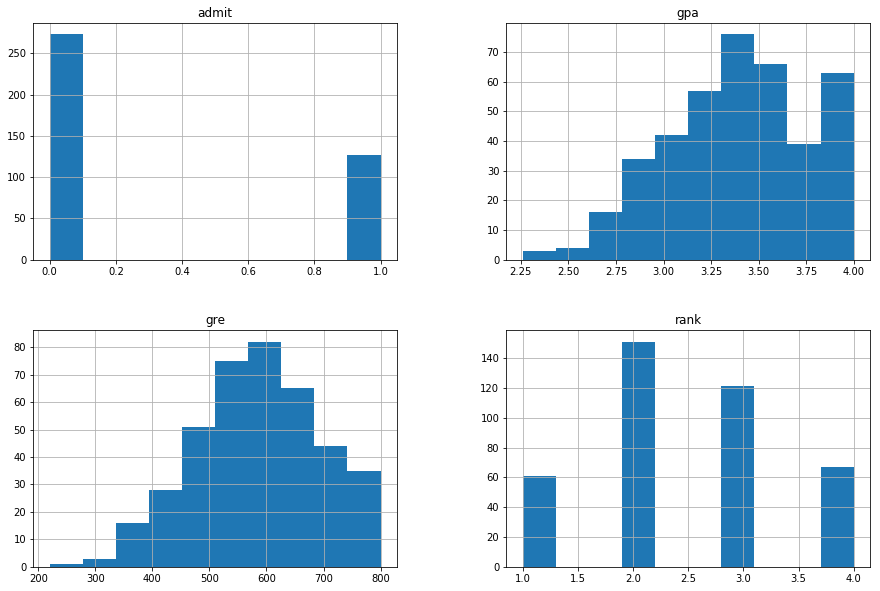

In [6]:
%matplotlib inline
admit.hist(figsize=(15, 10));

In [14]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

model = (smf.glm('admit ~ gpa + gre + C(rank)', data=admit, family=sm.families.Binomial())
            .fit())
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  admit   No. Observations:                  400
Model:                            GLM   Df Residuals:                      394
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -229.26
Date:                Wed, 19 Dec 2018   Deviance:                       458.52
Time:                        20:35:14   Pearson chi2:                     397.
No. Iterations:                     4   Covariance Type:             nonrobust
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -3.9900      1.140     -3.500      0.000      -6.224      -1.756
C(rank)[T.2]    -0.6754      0.316     -2.134      0.033      -1.296      -0.055
C(rank)[T.3]    -1.3402      0.345     -3.881      0.000      -2.017      -0.663
C(rank)[T.4]    -1.5515      0.418     -3.713      0.000      -2.370      -0.733
gpa              0.8040      0.332      2.423      0.015       0.154       1.454
gre              0.0023      0.001      2.070      0.038       0.000       0.004
================================================================================
"""

In [15]:
import numpy as np
np.exp(model.params)

Intercept       0.018500
C(rank)[T.2]    0.508931
C(rank)[T.3]    0.261792
C(rank)[T.4]    0.211938
gpa             2.234545
gre             1.002267
dtype: float64

#### Ejercicio regresión robusta

* Representar un scatter plot del array y_true2 sobre la columna 1 de X2
* Ajustar una regresión de X2 sobre y2 (`OLS`) y representarla en la misma gráfica. ¿Observas algún problema?
* Realizar un gráfico de influencia del modelo (`statmodels.graphics.influence_plot`)
* Ajustar ahora una regresión robusta (clase `RLM`) y añadir a la misma gráfica

In [16]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

nsample = 50
x = np.linspace(0, 20, nsample)
X = np.column_stack((np.ones(nsample), x))
sig = 0.3 
beta = [5, 0.5]
y_true = np.dot(X, beta)
y = y_true + sig*1. * np.random.normal(size=nsample)
y[[39,41,43,45,48]] -= 5 

In [17]:
res1 = sm.OLS(y, X).fit()
print(res1.params)
print(res1.bse)

res2 = sm.RLM(y, X).fit()
print(res2.params)
print(res2.bse)

[5.55783509 0.39240451]
[0.40141972 0.03458795]
[5.02321864 0.48989084]
[0.09326382 0.00803599]


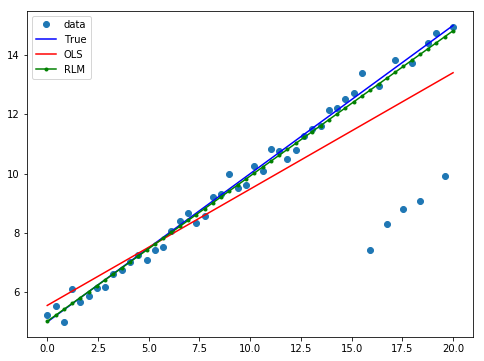

In [19]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y, 'o', label="data")
ax.plot(x, y_true, 'b-', label="True")
ax.plot(x, res1.fittedvalues, 'r-', label="OLS")
ax.plot(x, res2.fittedvalues, 'g.-', label="RLM")
legend = ax.legend(loc="best")

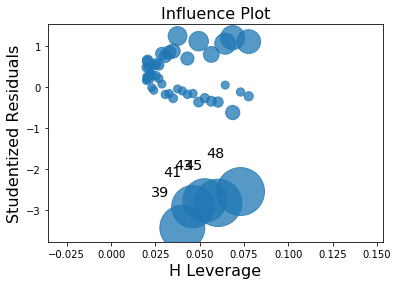

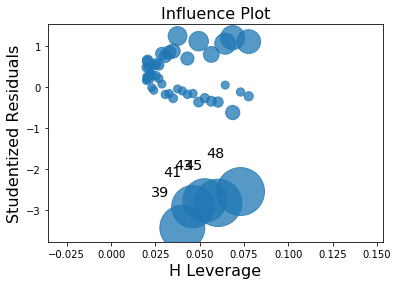

In [21]:
from statsmodels.graphics.regressionplots import influence_plot

influence_plot(res1)

#### Ejercicio titanic

Con el conjunto de datos `titanic.csv`:
 * Hacer un gráfico de barras con el número de pasajeros que han muerto y los que han sobrevivido por género
 * Hacer un gráfico de barras con el número de personas que sobrevivieron en cada grupo de edad (0-10, 11-20, 21-30, etc) (pista: .cut())
 * Calcular la probabilidad de supervivencia en base al sexo y a la clase
 * Calcular la probabilidad de supervivencia en base la edad, al título y a la clase
 * En vista de lo anterior, completar ahora los valores que faltan de la edad con la mediana pero agrupada por título y clase. Pista: usar .transform() y ver que parámetros acepta .fillna()
 * Convertir las variables no numéricas en numéricas con `.get_dummies()`
 * Ajustar un modelo de regresión logística

#### Ejercicio adult

1. Carga en un DataFrame este dataset:
https://archive.ics.uci.edu/ml/datasets/Census+Income
2. Calcula la correlación entre las distintas columnas (`pd.DataFrame.corr()`) y represéntala en un `heatmap`. ¿Qué pasa con las columnas no numéricas?
3. Representa las variables numéricas como un histograma y las no numéricas con un gráfico de barras
4. Explora las distintas variables y su relación con `salary` (por ejemplo haciendo gráficos de barras donde el eje y representa el salario medio)
5. Ajusta una regresión logística
6. Ordenar los coeficientes y representarlos en un gráfico de barras

In [12]:
import pandas as pd

adult = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/'
                    'adult/adult.data',
                    header=None)

In [13]:
adult.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
